In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

In [2]:
df = wrangle.get_curriculum_data()
df = wrangle.prepare_datetime_col(df)

Returning saved csv files.


3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

### A : The students who were in the bottom 25% of total pings were all in full stack java cohorts between 2018-02 and 2019-10.  The difference between their last ping time and the end of the cohort indicates that about half of them may have left the program.

- There are in the following cohorts : Sequoia (21), Teddy (5), Ulysses (7), Voyageurs (6), Xanadu (2), Yosemite (7), Zion (2), Andromeda (4), Betelgeuse (11)
- These are all full stack java cohorts ending inbetween 2018-02 to 2019-10
- In looking at the difference between the students last ping and the end date for the cohort, just over half of these students made their last ping two weeks before the end of the cohort, indicating that they may have left.

first get a dataframe of only students and change the date cols to datetime objects

In [3]:
#get a dataframe of just students
def get_students_df(df):
    return df[~(df.name=='Staff')]

students_df = get_students_df(df)

In [4]:
students_df

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp
0,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900210,jquery/personal-site,869,135.0,136.50.98.51,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,NaN,full_stack_java,2021-04-21 16:36:09
900211,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,138.0,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,NaN,full_stack_java,2021-04-21 16:36:34
900212,java-iii,834,134.0,67.11.50.23,134.0,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,NaN,full_stack_java,2021-04-21 16:37:48
900213,java-iii/servlets,834,134.0,67.11.50.23,134.0,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,NaN,full_stack_java,2021-04-21 16:38:14


In [5]:
def make_timedate_columns(df):
    """
    Make all the columns with dates into datetime columns
    """
    df['start_date'] = pd.to_datetime(df['start_date'])
    df['end_date'] = pd.to_datetime(df['end_date'])
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['update_at'] = pd.to_datetime(df['updated_at'])
    return df

df = make_timedate_columns(df)
students_df = get_students_df(df)

Now filter out students that access the website when their cohort is active

In [6]:
active_students = students_df[(students_df.timestamp > students_df.start_date) & (students_df.timestamp < students_df.end_date)]

### How often does a typical student access the curriculum during their cohort time period?

average student accesses the curriculum about 828 times, and 75% of students access the curriculum at least 422 times.  these numbers have increased in recent cohorts.

In [7]:
active_students.user_id.value_counts().describe()

count     731.000000
mean      885.359781
std       646.913009
min         1.000000
25%       391.500000
50%       795.000000
75%      1235.500000
max      4763.000000
Name: user_id, dtype: float64

In [8]:
# these numbers increase slightly for recent cohorts
active_students[active_students.start_date.dt.year >= 2018].user_id.value_counts().describe()

count     710.000000
mean      908.478873
std       642.010026
min         1.000000
25%       455.250000
50%       825.000000
75%      1257.000000
max      4763.000000
Name: user_id, dtype: float64

<AxesSubplot:xlabel='timestamp', ylabel='Count'>

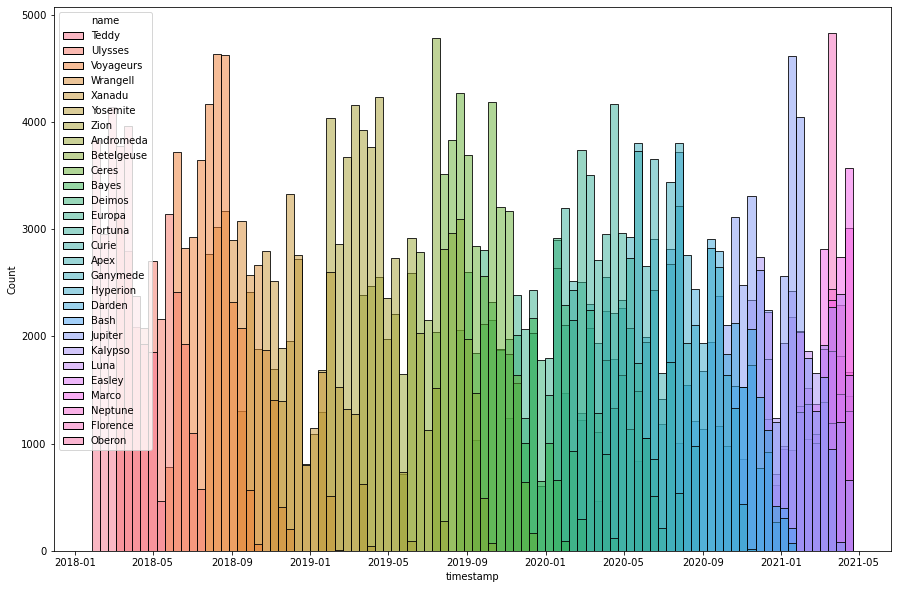

In [9]:
# what is the plot of access time for recent cohorts?
plt.figure(figsize=(15, 10))
sns.histplot(data = active_students[active_students.start_date.dt.year >= 2018], x= 'timestamp', hue='name')

### Get all students that are in the bottom 25% of total pings and look at their characteristics

- There are in the following cohorts : Sequoia (21), Teddy (5), Ulysses (7), Voyageurs (6), Xanadu (2), Yosemite (7), Zion (2), Andromeda (4), Betelgeuse (11)
- These are all full stack java cohorts ending inbetween 2018-02 to 2019-10
- In looking at the difference between the students last ping and the end date for the cohort, just over half of these students made their last ping two weeks before the end of the cohort, indicating that they may have left.

In [10]:
usercounts = pd.DataFrame(active_students[['user_id']].value_counts()).rename(columns={0:'count'})
low_ping_users = usercounts[usercounts['count'] <= active_students.user_id.value_counts().quantile(0.25)].reset_index()['user_id']

what cohorts are they in?

In [11]:
active_students[active_students.user_id.isin(low_ping_users)].name.unique()

array(['Sequoia', 'Teddy', 'Ulysses', 'Voyageurs', 'Yosemite', 'Xanadu',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Hyperion',
       'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna', 'Easley', 'Marco',
       'Neptune', 'Florence', 'Oberon'], dtype=object)

what program?

In [12]:
active_students[active_students.user_id.isin(low_ping_users)].program_name.unique()

array(['full_stack_java', 'data_science'], dtype=object)

how many are there in each cohort?

In [13]:
active_students[active_students.user_id.isin(low_ping_users)].groupby('name').user_id.nunique()

name
Andromeda      5
Apex           4
Bash           4
Bayes          1
Betelgeuse     1
Ceres          3
Curie          1
Darden         5
Deimos         2
Easley         1
Europa         3
Florence      13
Fortuna        2
Ganymede       4
Hyperion       4
Jupiter        8
Kalypso        3
Luna           4
Marco         11
Neptune       34
Oberon        26
Sequoia       21
Teddy          4
Ulysses        5
Voyageurs      6
Xanadu         1
Yosemite       7
Zion           2
Name: user_id, dtype: int64

When were these cohorts active?

In [14]:
active_students[active_students.user_id.isin(low_ping_users)].end_date.unique()

array(['2018-02-15T00:00:00.000000000', '2018-05-17T00:00:00.000000000',
       '2018-07-19T00:00:00.000000000', '2018-10-11T00:00:00.000000000',
       '2019-04-03T00:00:00.000000000', '2019-02-08T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-07-30T00:00:00.000000000',
       '2019-10-08T00:00:00.000000000', '2019-12-11T00:00:00.000000000',
       '2020-01-30T00:00:00.000000000', '2020-02-27T00:00:00.000000000',
       '2020-04-17T00:00:00.000000000', '2020-06-23T00:00:00.000000000',
       '2020-07-07T00:00:00.000000000', '2020-07-29T00:00:00.000000000',
       '2020-08-20T00:00:00.000000000', '2020-11-10T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-03-30T00:00:00.000000000', '2021-05-04T00:00:00.000000000',
       '2021-06-08T00:00:00.000000000', '2021-07-19T00:00:00.000000000',
       '2021-09-03T00:00:00.000000000', '2021-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

When were the students accessing the curriculum?

Text(0.5, 1.0, 'Access times of low ping students')

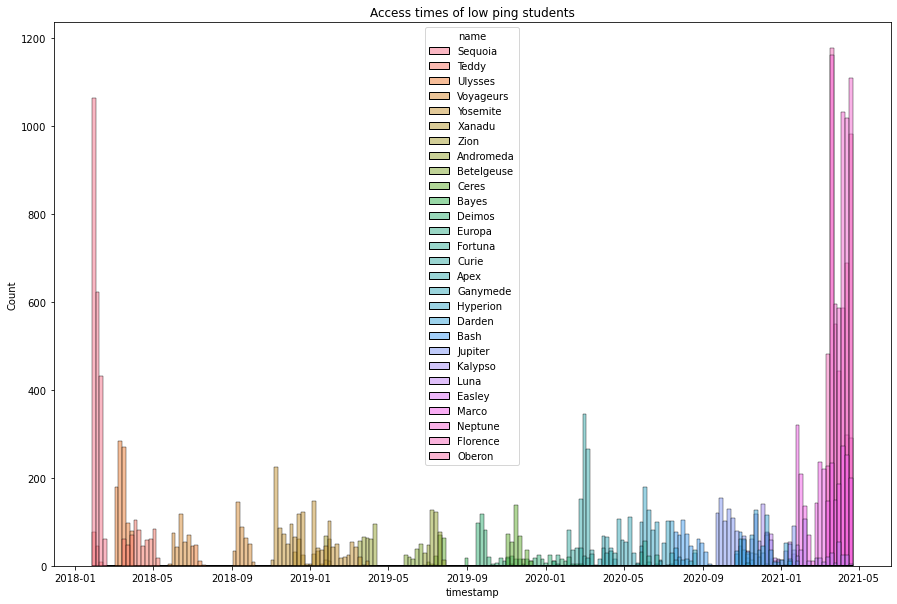

In [15]:
plt.figure(figsize=(15, 10))

sns.histplot(
    data=active_students[active_students.user_id.isin(low_ping_users)],
    x = 'timestamp',
    hue = 'name',
    bins = 200
)
plt.title('Access times of low ping students')

What were they accessing?

Most commonly accessing spring and html and javascript i

In [16]:
active_students[active_students.user_id.isin(low_ping_users)].path.value_counts().nlargest(50)

/                                                                            1808
toc                                                                           942
javascript-i                                                                  763
html-css                                                                      734
javascript-i/introduction/working-with-data-types-operators-and-variables     731
javascript-i/functions                                                        644
javascript-i/javascript-with-html                                             635
javascript-i/conditionals                                                     571
javascript-i/introduction/operators                                           528
javascript-i/introduction/primitive-types                                     502
html-css/css-ii/bootstrap-grid-system                                         497
search/search_index.json                                                      470
html-css/element

when were they active?

look at Betelgeuse in isolation for visualization

In [17]:
low_ping_hits = active_students[active_students.user_id.isin(low_ping_users)]

<AxesSubplot:xlabel='timestamp', ylabel='Count'>

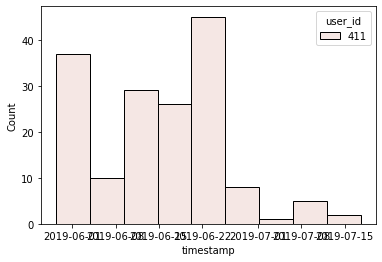

In [18]:
sns.histplot(data = low_ping_hits[low_ping_hits['name'] == 'Betelgeuse'], x='timestamp', hue='user_id')

In [19]:
low_ping_hits['diff_to_end'] = low_ping_hits['timestamp'] - low_ping_hits['end_date']

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_79698/2696340186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_ping_hits['diff_to_end'] = low_ping_hits['timestamp'] - low_ping_hits['end_date']


In [20]:
low_ping_hits['diff_to_end'].describe()

count                            29800
mean     -122 days +19:20:04.607785236
std         52 days 23:00:14.372532429
min                -190 days +14:21:36
25%                -163 days +10:29:08
50%                -142 days +22:06:21
75%         -101 days +09:11:36.500000
max                  -1 days +22:06:47
Name: diff_to_end, dtype: object

It looks like some of these students might have quit before the end of the cohort.  Investigate this.

In [21]:
low_ping_hits.groupby('user_id')['diff_to_end'].describe().sort_values('max').head(35)

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
772,26,-188 days +00:12:43.692307692,0 days 19:19:49.393175551,-190 days +15:49:40,-189 days +09:39:25.500000,-188 days +11:17:43,-188 days +14:21:21.750000,-188 days +14:54:20
697,13,-183 days +15:21:22.692307692,0 days 00:01:35.816999722,-183 days +15:20:27,-183 days +15:20:50,-183 days +15:20:59,-183 days +15:21:02,-183 days +15:26:39
679,11,-183 days +19:43:37.545454546,0 days 07:57:17.530649005,-183 days +14:37:22,-183 days +14:39:36.500000,-183 days +15:49:31,-183 days +23:57:23.500000,-182 days +08:05:15
839,92,-180 days +14:17:33.250000,1 days 23:25:30.243406234,-182 days +10:50:16,-182 days +20:08:07,-180 days +13:55:14.500000,-180 days +14:15:21.750000,-176 days +15:50:48
879,1,-174 days +12:21:18,NaT,-174 days +12:21:18,-174 days +12:21:18,-174 days +12:21:18,-174 days +12:21:18,-174 days +12:21:18
918,1,-172 days +16:59:56,NaT,-172 days +16:59:56,-172 days +16:59:56,-172 days +16:59:56,-172 days +16:59:56,-172 days +16:59:56
940,1,-172 days +17:00:37,NaT,-172 days +17:00:37,-172 days +17:00:37,-172 days +17:00:37,-172 days +17:00:37,-172 days +17:00:37
941,12,-172 days +17:00:56.333333334,0 days 00:00:06.984832051,-172 days +17:00:46,-172 days +17:00:50.750000,-172 days +17:00:56,-172 days +17:01:02.250000,-172 days +17:01:07
702,89,-177 days +01:16:52.966292134,4 days 00:52:09.962469349,-185 days +14:08:26,-181 days +09:21:25,-177 days +11:22:41,-174 days +14:01:23,-171 days +14:09:20


# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

### A:  There is evidence of webscraping.  For example, ip `216.1.153.162` moves through a lot of pages within seconds.  There are a series of user_id that are not associated with any cohort; these could be suspicious-- particularly since some of them seem to be on the wifi.  It could be the case that they could be guests using the network, but there are more nefarious interpretations of this.

- the following user_id are not associated with a cohort : `48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88, 89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 372, 375, 403, 406, 429`
    - some of these are associated only with one ip

- `97.105.19.58` and `97.105.19.61` are likely wifi, but because of the significant traffic and users, it might be worth double checking what these ip addresses are.

Scrapers will probably have a lot of hits with little difference between times

In [22]:
df.ip.value_counts().nlargest(20)

97.105.19.58       284579
97.105.19.61        61662
192.171.117.210      9515
71.150.217.33        6791
76.185.145.231       4754
12.106.208.194       4360
67.11.50.23          4181
70.112.179.142       4117
70.121.183.95        3843
172.124.67.93        3511
99.76.233.212        3491
24.243.67.104        3232
67.10.174.56         3115
72.190.174.52        2939
104.10.49.137        2711
216.63.31.195        2655
76.185.131.226       2645
66.196.21.182        2612
173.173.115.201      2599
136.50.32.151        2570
Name: ip, dtype: int64

IP `97.105.19.58` is likely wifi for classes

In [23]:
df_ip = df[df['ip']=='97.105.19.58']

In [24]:
df_ip['time_change'] = df_ip.timestamp.diff(1)

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_79698/1447244642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ip['time_change'] = df_ip.timestamp.diff(1)


In [25]:
df_ip['time_change'].describe()

count                       284578
mean     0 days 00:03:07.126671773
std      0 days 01:25:32.389904263
min                0 days 00:00:00
25%                0 days 00:00:03
50%                0 days 00:00:09
75%                0 days 00:00:39
max               11 days 21:26:59
Name: time_change, dtype: object

In [26]:
df_ip.name.value_counts()

Ceres         26953
Zion          24141
Staff         23593
Deimos        21503
Betelgeuse    20763
Xanadu        20418
Europa        17470
Andromeda     17423
Wrangell      17394
Bayes         16975
Voyageurs     16267
Yosemite      15868
Fortuna       11888
Curie          5189
Lassen         4436
Arches         3649
Olympic        2628
Sequoia        1048
Ulysses         367
Hampton         338
Niagara          99
Glacier          86
Mammoth          78
Quincy           35
Pinnacles        17
Ganymede         13
Teddy             9
Name: name, dtype: int64

`97.105.19.61` is liekly a class wifi too.

In [27]:
df_ip = df[df['ip'] == '97.105.19.61']

In [28]:
df_ip.name.value_counts()

Ulysses      20342
Teddy        20191
Voyageurs    10218
Arches        3924
Lassen        2307
Sequoia       1812
Hampton       1016
Pinnacles      345
Niagara        324
Kings           31
Quincy          20
Name: name, dtype: int64

look at the difference between the ip's last timestamp

In [29]:
df_copy = df.copy()
df_copy['time_change'] = df.groupby('ip').timestamp.diff(1)

In [30]:
df_copy[df_copy.time_change < pd.Timedelta('00:00:01')].ip.value_counts().nlargest(10)

97.105.19.58       12310
97.105.19.61        1944
76.185.145.231       780
70.112.179.142       759
172.124.67.93        729
99.76.233.212        484
173.173.115.201      382
76.185.131.226       338
71.150.217.33        336
148.66.39.72         302
Name: ip, dtype: int64

`97.105.19.58` and `97.105.19.61` are likely wifi.  check the others.

this ip looks like a webscraper.  it is moving through a lot of pages in a short period of time.

In [31]:
df[df['ip'] == '216.1.153.162'].sort_values('timestamp')

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,update_at
2069,index.html,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:44,2016-06-14 19:52:26
2070,content/laravel/intro,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:47,2016-06-14 19:52:26
2071,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:48,2016-06-14 19:52:26
2072,content/laravel/intro/application-structure.html,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:48,2016-06-14 19:52:26
2073,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:49,2016-06-14 19:52:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295471,content/laravel/quickstart/templating.html,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-10 10:08:44,2016-06-14 19:52:26
295472,content/laravel/quickstart/controllers.html,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-10 10:08:44,2016-06-14 19:52:26
295473,content/laravel/quickstart/artisan.html,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-10 10:08:53,2016-06-14 19:52:26
295475,content/laravel/quickstart/db-migrations.html,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-10 10:08:57,2016-06-14 19:52:26


In [32]:
df_copy[(df_copy['ip']=='216.1.153.162') & (df_copy.time_change < pd.Timedelta('00:00:01'))]

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,update_at,time_change
2072,content/laravel/intro/application-structure.html,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:48,2016-06-14 19:52:26,0 days
2075,content/laravel/quickstart/gitbook/images/favi...,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:50,2016-06-14 19:52:26,0 days
2078,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:38:31,2016-06-14 19:52:26,0 days
2080,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:38:33,2016-06-14 19:52:26,0 days
9410,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-02-13 13:37:15,2016-06-14 19:52:26,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292644,content/php_iv/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-03 15:09:36,2016-06-14 19:52:26,0 days
292646,content/php_iv/php-with-mysql/gitbook/images/f...,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-03 15:09:38,2016-06-14 19:52:26,0 days
295464,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-10 10:08:23,2016-06-14 19:52:26,0 days
295469,content/laravel/quickstart/gitbook/images/favi...,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-10 10:08:40,2016-06-14 19:52:26,0 days


<AxesSubplot:xlabel='timestamp', ylabel='Count'>

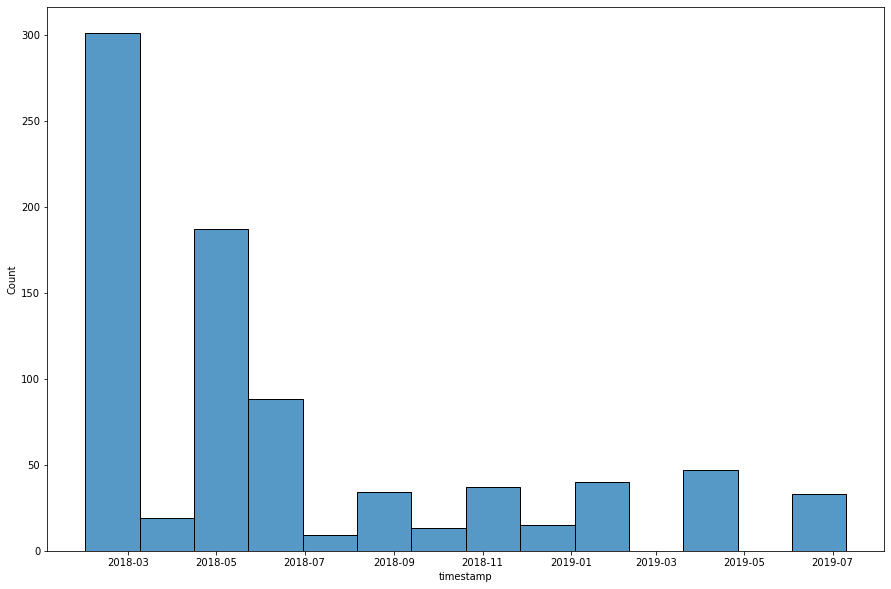

In [33]:
plt.figure(figsize=(15, 10))
sns.histplot(data = df[df['ip'] == '216.1.153.162'], x='timestamp',legend=False)

Look for ips that are accessing images.

In [34]:
#df[df.path.str.contains('image')].ip.value_counts()

In [35]:
df[df['ip']=='136.50.29.193']

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,update_at
4676,/,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,full_stack_php,2018-02-02 22:11:39,2016-07-18 19:06:27
4677,content/html-css,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,full_stack_php,2018-02-02 22:13:10,2016-07-18 19:06:27
4678,content/html-css/gitbook/images/favicon.ico,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,full_stack_php,2018-02-02 22:13:11,2016-07-18 19:06:27
4679,content/html-css,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,full_stack_php,2018-02-02 22:13:15,2016-07-18 19:06:27
4680,content/html-css/introduction.html,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,full_stack_php,2018-02-02 22:13:17,2016-07-18 19:06:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882427,content/javascript/primitive-types.html,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,full_stack_php,2021-04-09 00:10:34,2016-07-18 19:06:27
882428,content/javascript/javascript-with-html.html,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,full_stack_php,2021-04-09 00:10:50,2016-07-18 19:06:27
883788,content/javascript/javascript-with-html.html,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,full_stack_php,2021-04-10 00:28:10,2016-07-18 19:06:27
883789,content/javascript/conditionals.html,80,14.0,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,full_stack_php,2021-04-10 00:28:11,2016-07-18 19:06:27


look at users without any cohort

In [36]:
df[df.name.isna()]

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,update_at
411,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,unknown_program,2018-01-26 16:46:16,NaT
412,spring/extra-features/form-validation,48,NaN,97.105.19.61,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,unknown_program,2018-01-26 16:46:24,NaT
425,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,unknown_program,2018-01-26 17:54:24,NaT
435,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,unknown_program,2018-01-26 18:32:03,NaT
436,mysql/relationships/joins,48,NaN,97.105.19.61,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,unknown_program,2018-01-26 18:32:17,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899897,javascript-ii,717,NaN,136.50.102.126,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,unknown_program,2021-04-21 12:49:00,NaT
899898,javascript-ii/es6,717,NaN,136.50.102.126,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,unknown_program,2021-04-21 12:49:02,NaT
899899,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,unknown_program,2021-04-21 12:51:27,NaT
899900,javascript-ii/promises,717,NaN,136.50.102.126,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,unknown_program,2021-04-21 12:52:37,NaT


In [37]:
df[df.name.isna()].path.value_counts()

/                                          4459
search/search_index.json                   1985
javascript-i                                780
toc                                         706
spring                                      641
                                           ... 
4-python/intro-to-sklearn                     1
12-advanced-topics/3.3-building-a-model       1
10-nlp/exercises                              1
7-clustering/3-wrangle                        1
appendix/further-reading/jquery/effects       1
Name: path, Length: 1112, dtype: int64

In [38]:
df[df.program_name == 'unknown_program'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52893 entries, 411 to 899902
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   path          52893 non-null  object        
 1   user_id       52893 non-null  int64         
 2   cohort_id     0 non-null      float64       
 3   ip            52893 non-null  object        
 4   id            0 non-null      float64       
 5   name          0 non-null      object        
 6   slack         0 non-null      object        
 7   start_date    0 non-null      datetime64[ns]
 8   end_date      0 non-null      datetime64[ns]
 9   created_at    0 non-null      datetime64[ns]
 10  updated_at    0 non-null      object        
 11  deleted_at    0 non-null      float64       
 12  program_name  52893 non-null  object        
 13  timestamp     52893 non-null  datetime64[ns]
 14  update_at     0 non-null      datetime64[ns]
dtypes: datetime64[ns](5), float64(3),

In [39]:
df[df.program_name == 'unknown_program'].ip.value_counts()

97.105.19.58       15931
70.117.16.60        1903
67.11.117.74        1729
70.94.165.107       1715
23.116.170.48       1616
                   ...  
72.181.117.212         1
173.149.221.121        1
96.8.179.87            1
172.124.66.235         1
172.58.111.220         1
Name: ip, Length: 413, dtype: int64

In [40]:
df[df.id.isna()].user_id.unique()

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544,  64, 713,
       714, 715, 716, 717, 718, 663, 719, 720, 721, 722, 723, 724, 725,
       726, 727, 728, 729, 346, 731, 736, 644, 744, 782, 810, 814, 815])

In [41]:
df[df.program_name == 'unknown_program'].user_id.unique()

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544,  64, 713,
       714, 715, 716, 717, 718, 663, 719, 720, 721, 722, 723, 724, 725,
       726, 727, 728, 729, 346, 731, 736, 644, 744, 782, 810, 814, 815])

In [42]:
df[(df['ip']=='97.105.19.58') & (df.program_name == 'unknown_program')].user_id.unique()

array([ 58, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360,
       361, 362, 363, 364, 365, 366, 367, 368, 369, 372, 375, 403, 406,
       429])

In [43]:
outputs = []
for ip in df[df.program_name == 'unknown_program'].ip.unique():
    output = {
        'ip': ip,
        'users': df[(df['ip']==ip)&(df.program_name == 'unknown_program')].user_id.unique(),
        'total_of_users':df[(df['ip']==ip)].user_id.unique().shape[0]
    }
    outputs.append(output)
ip_sus = pd.DataFrame(outputs)

In [44]:
ip_sus[ip_sus.total_of_users < 2]

,ip,users,total_of_users
1,24.160.159.122,[54],1
2,66.69.62.219,[48],1
4,67.10.168.76,[61],1
7,173.173.114.158,[61],1
8,72.48.111.7,[73],1
...,...,...,...
408,107.77.222.176,[728],1
409,172.56.6.105,[727],1
410,71.41.192.86,[723],1
411,162.211.70.252,[815],1


<AxesSubplot:xlabel='timestamp', ylabel='Count'>

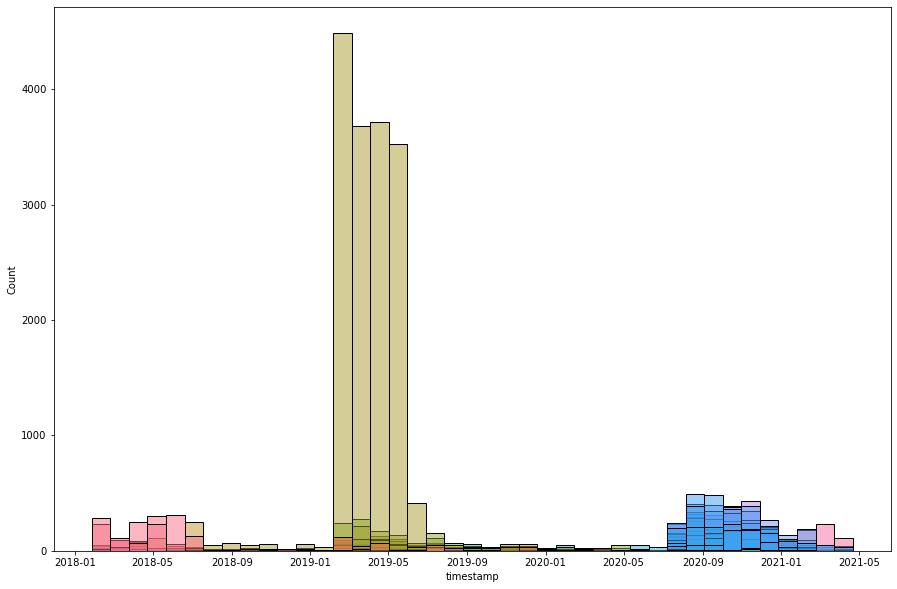

In [45]:
plt.figure(figsize=(15, 10))
sns.histplot(data = df[df.program_name == 'unknown_program'], x='timestamp', hue='ip', legend=False)

In [46]:
df[(df.path.str.contains('favicon')) & (df.ip == '216.1.153.162')]

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp,update_at
2071,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:48,2016-06-14 19:52:26
2073,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:49,2016-06-14 19:52:26
2075,content/laravel/quickstart/gitbook/images/favi...,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:37:50,2016-06-14 19:52:26
2078,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:38:31,2016-06-14 19:52:26
2080,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-30 11:38:33,2016-06-14 19:52:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292642,content/php_iii/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-03 15:09:35,2016-06-14 19:52:26
292644,content/php_iv/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-03 15:09:36,2016-06-14 19:52:26
292646,content/php_iv/php-with-mysql/gitbook/images/f...,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-03 15:09:38,2016-06-14 19:52:26
295464,content/laravel/intro/gitbook/images/favicon.ico,68,13.0,216.1.153.162,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2019-07-10 10:08:23,2016-06-14 19:52:26


<AxesSubplot:xlabel='timestamp', ylabel='Count'>

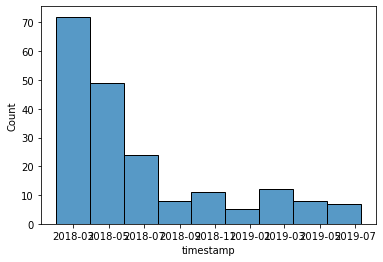

In [47]:
sns.histplot(data=df[(df.path.str.contains('favicon')) & (df.ip == '216.1.153.162')], x='timestamp')

In [49]:
df.name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Darden        32015
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Bayes         26538
Wrangell      25586
Andromeda     25359
Kalypso       23691
Curie         21582
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Easley        14715
Lassen         9587
Arches         8890
Florence       8562
Sequoia        7444
Neptune        7276
Olympic        4954
Kings          2845
Pinnacles      2158
Hampton        1712
Oberon         1672
Quincy         1237
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: name, dtype: int64